# 🎓 From Scores to Seats: The Grad School ML Challenge

Welcome to the starter notebook for this beginner-friendly data science hackathon! In this challenge, your goal is to build a machine learning model that can predict whether a student will be admitted into a graduate program based on their academic profile.

This notebook will walk you through a simple end-to-end pipeline:
- Loading and exploring the data
- Preprocessing
- Training a baseline model
- Making predictions
- Preparing a submission

---

## 📦 Files
- `train.csv`: Training data (features + target)
- `test.csv`: Test data (features only)
- `SampleSubmission.csv`: Format for submitting predictions

---

## 🧠 Target Variable
- `Admitted`: 1 if the student was admitted, 0 otherwise

Let's get started! 🚀


In [1]:
# 📚 Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# 📥 Load the Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("SampleSubmission.csv")

# Peek at the data
train.head()


,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted,Age,Location,First_Generation
0,ID_000001,319.0,111.0,4,4.78,4.89,9.51,1,1,26,South America,1
1,ID_000002,327.0,113.0,5,4.24,4.74,10.19,1,1,23,Africa,1
2,ID_000003,323.0,110.0,4,3.43,2.99,8.81,1,1,32,South America,0
3,ID_000004,321.0,105.0,3,3.41,3.38,NaN,0,0,34,Africa,1
4,ID_000005,316.0,108.0,3,NaN,4.80,NaN,1,1,30,North America,1


## 🔍 Exploratory Data Analysis (EDA)
Let’s explore the training data to understand the features and target.


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3600 non-null   object 
 1   GRE Score          3240 non-null   float64
 2   TOEFL Score        3240 non-null   float64
 3   University Rating  3600 non-null   int64  
 4   SOP                3240 non-null   float64
 5   LOR                3600 non-null   float64
 6   CGPA               3240 non-null   float64
 7   Research           3600 non-null   int64  
 8   Admitted           3600 non-null   int64  
 9   Age                3600 non-null   int64  
 10  Location           3600 non-null   object 
 11  First_Generation   3600 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 337.6+ KB


### 🏷️ Encoding 'Location'

We used **one-hot encoding** to convert the categorical `Location` column into numeric format. This creates binary columns for each unique location (excluding one to avoid redundancy):


In [4]:
train = pd.get_dummies(train, columns=['Location'], drop_first=True)
test = pd.get_dummies(test, columns=['Location'], drop_first=True)

In [5]:
# Check for missing values
train.isnull().sum()


ID                          0
GRE Score                 360
TOEFL Score               360
University Rating           0
SOP                       360
LOR                         0
CGPA                      360
Research                    0
Admitted                    0
Age                         0
First_Generation            0
Location_Asia               0
Location_Europe             0
Location_North America      0
Location_South America      0
dtype: int64

In [6]:
# Fill missing numeric values with the mean of each column
numeric_cols = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA']
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].mean())

# Double check to confirm missing values are handled
print("Remaining missing values:", train.isnull().sum().sum())


Remaining missing values: 0


In [7]:
train

,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted,Age,First_Generation,Location_Asia,Location_Europe,Location_North America,Location_South America
0,ID_000001,319.00000,111.000000,4,4.78000,4.89,9.510000,1,1,26,1,0,0,0,1
1,ID_000002,327.00000,113.000000,5,4.24000,4.74,10.190000,1,1,23,1,0,0,0,0
2,ID_000003,323.00000,110.000000,4,3.43000,2.99,8.810000,1,1,32,0,0,0,0,1
3,ID_000004,321.00000,105.000000,3,3.41000,3.38,8.576917,0,0,34,1,0,0,0,0
4,ID_000005,316.00000,108.000000,3,3.37371,4.80,8.576917,1,1,30,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,ID_003596,318.00000,109.000000,2,3.62000,3.99,8.760000,1,1,22,0,1,0,0,0
3596,ID_003597,313.00000,98.000000,4,3.09000,3.86,9.250000,1,1,27,0,0,0,0,1
3597,ID_003598,315.67037,118.000000,4,4.51000,3.35,9.230000,1,1,22,0,0,0,0,1
3598,ID_003599,322.00000,106.384877,5,4.04000,3.86,9.270000,1,1,27,1,0,0,1,0


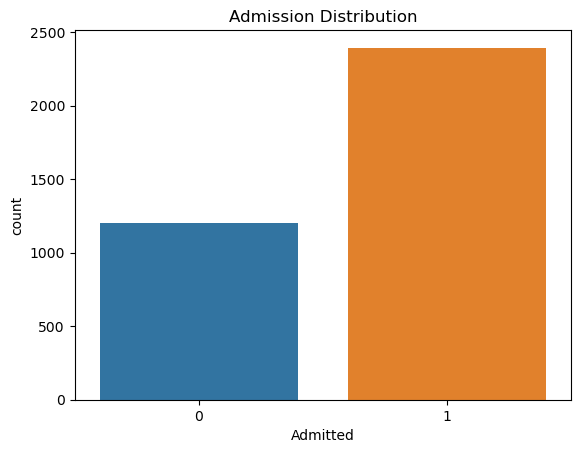

In [8]:
# Distribution of target variable
sns.countplot(x='Admitted', data=train)
plt.title("Admission Distribution")
plt.show()


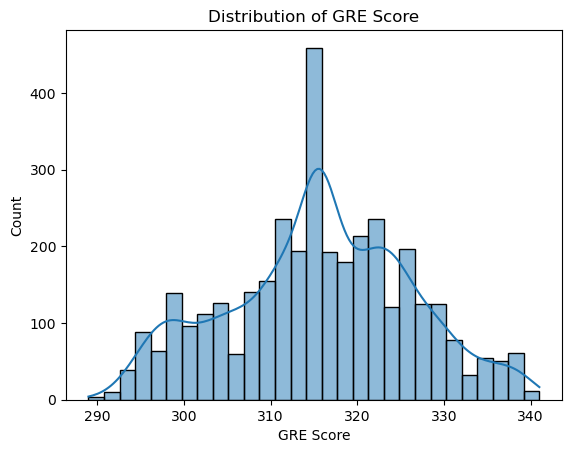

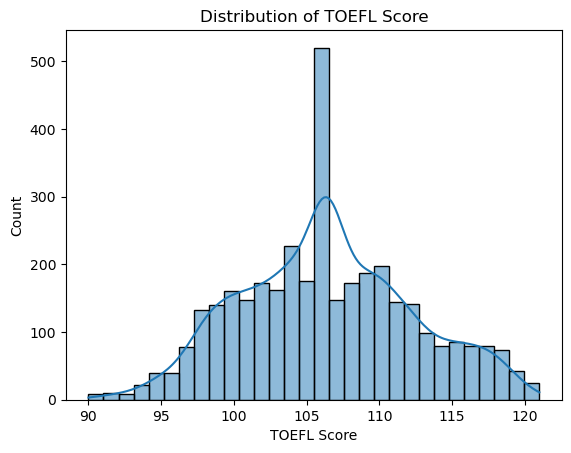

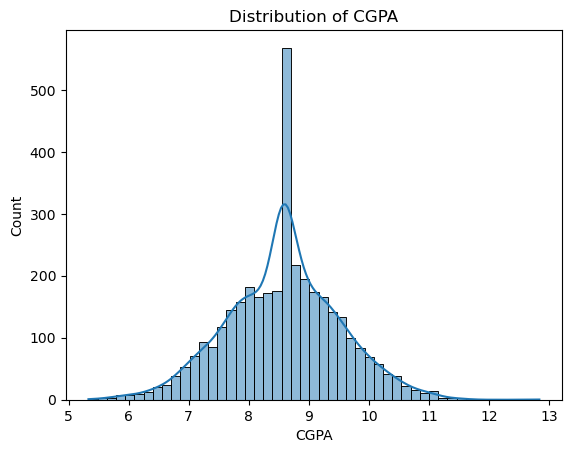

In [9]:
# Plot distributions of key features
num_features = ['GRE Score', 'TOEFL Score', 'CGPA']
for col in num_features:
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [15]:
train

,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted,Age,First_Generation,Location_Asia,Location_Europe,Location_North America,Location_South America
0,ID_000001,319.00000,111.000000,4,4.78000,4.89,9.510000,1,1,26,1,0,0,0,1
1,ID_000002,327.00000,113.000000,5,4.24000,4.74,10.190000,1,1,23,1,0,0,0,0
2,ID_000003,323.00000,110.000000,4,3.43000,2.99,8.810000,1,1,32,0,0,0,0,1
3,ID_000004,321.00000,105.000000,3,3.41000,3.38,8.576917,0,0,34,1,0,0,0,0
4,ID_000005,316.00000,108.000000,3,3.37371,4.80,8.576917,1,1,30,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,ID_003596,318.00000,109.000000,2,3.62000,3.99,8.760000,1,1,22,0,1,0,0,0
3596,ID_003597,313.00000,98.000000,4,3.09000,3.86,9.250000,1,1,27,0,0,0,0,1
3597,ID_003598,315.67037,118.000000,4,4.51000,3.35,9.230000,1,1,22,0,0,0,0,1
3598,ID_003599,322.00000,106.384877,5,4.04000,3.86,9.270000,1,1,27,1,0,0,1,0


## 🧹 Preprocessing
We’ll split the data into features and target, and then into training and validation sets.


In [10]:
# Features and target
X = train.drop(columns=['Admitted', "ID"])
y = train['Admitted']

# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape


((2880, 13), (720, 13))

## 🤖 Model Training
We’ll use a simple Random Forest classifier as our baseline model.


In [11]:
# Train a Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8305555555555556
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       248
           1       0.84      0.92      0.88       472

    accuracy                           0.83       720
   macro avg       0.82      0.79      0.80       720
weighted avg       0.83      0.83      0.83       720



Accuracy: 0.8305555555555556

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       248
           1       0.84      0.92      0.88       472

    accuracy                           0.83       720
   macro avg       0.82      0.79      0.80       720
weighted avg       0.83      0.83      0.83       720



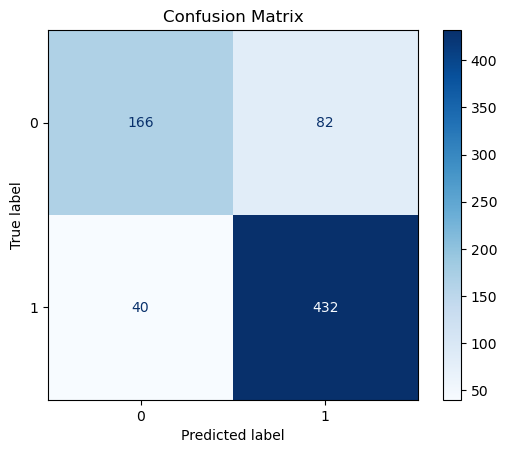

In [13]:
# 📈 Evaluate Model on Validation Set

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on validation data
y_pred = model.predict(X_val)

# Accuracy score
print("Accuracy:", accuracy_score(y_val, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## 📊 Feature Importance
Let’s see which features are most important to the model.

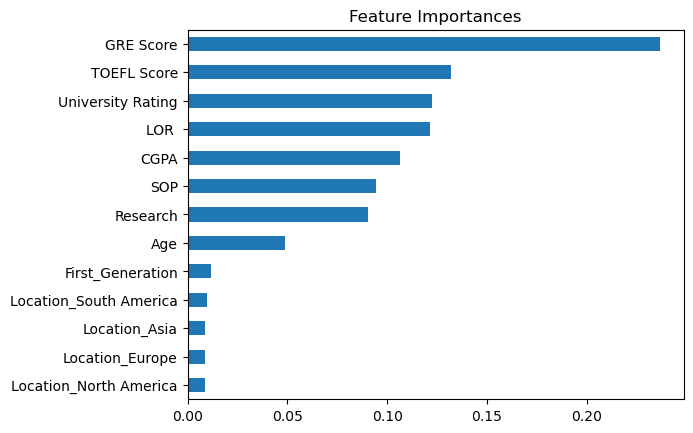

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()


## 🚀 Predictions on Test Set
Let’s predict on the test set and generate a submission file.


In [16]:
test_predictions = model.predict(test.drop("ID", axis=1))

# Prepare submission
submission = sample_submission.copy()
submission['Admitted'] = test_predictions

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file saved!")


Submission file saved!


## ✅ What’s Next?

This is just a baseline model! You can improve your score by:
- Trying other models (Logistic Regression, XGBoost, etc.)
- Feature scaling or transformation
- Hyperparameter tuning
- Model ensembling

Good luck, and happy modeling! 💪


### Hosts: Olufemi Victor Tolulope & Olaleye Eniola

Victor's Socials:

- [Twitter](https://twitter.com/olufemivictort)
- [LinkedIn](https://www.linkedin.com/in/olufemi-victor-tolulope)
- [website](https://www.olufemivictor.com/)

Eniola's Socials
- [Twitter](https://x.com/galileoeni)
- [LinkedIn](https://www.linkedin.com/in/eniola-olaleye-361b39160)
- [website](https://galileoeni.github.io/galileo/)